**taking the inbulid data**

In [ ]:
data()

In [ ]:
data=stackloss#selected stackloss data

In [ ]:
data

Air.Flow,Water.Temp,Acid.Conc.,stack.loss
<dbl>,<dbl>,<dbl>,<dbl>
80,27,89,42
80,27,88,37
75,25,90,37
62,24,87,28
62,22,87,18
62,23,87,18
62,24,93,19
62,24,93,20
58,23,87,15


#**Question 1**


#**Consider a relational dataset and specify your input and output variables , then:**

**(a)**	Train the model using 80% of this dataset and suggest an appropriate GLM to model ouput to input variables.  

In [ ]:
set.seed(32)#random sampling
n=nrow(data)#counting number of rows
indexes=sample(n,n*(80/100))#selecting 80% and 20%
trainset=data[indexes,]#tainset with 80% data
testset=data[-indexes,]#testset with 20% data

In [ ]:
cor(trainset[, c("Air.Flow", "Water.Temp", "Acid.Conc.")])#to check corelation


,Air.Flow,Water.Temp,Acid.Conc.
Air.Flow,1.0000000,0.8168390,0.4619075
Water.Temp,0.8168390,1.0000000,0.3609411
Acid.Conc.,0.4619075,0.3609411,1.0000000


In [ ]:
model=glm(stack.loss~.,family='gaussian',data=trainset)
#here the depented variable is stack.loss and the independent variables
#family is gaussian

In [ ]:
#estimate coeffcient of the fitted GLM
coef(model)

(Intercept)    Air.Flow  Water.Temp  Acid.Conc. 
-40.8219580   0.7142128   1.3097608  -0.1497563

**intercept**:Air Flow, Water Temperature, and Acid Concentration are 0 the predict stack loss will be 40.82

**Air Flow**:1-unit in air flow the predicted stack loss increase by 0.71

**Water Temperature**:1-unit in water temperature the predict stack loss increase by 1.31

**Acid Concentration**:1-unit increase in acid concentration the predict stack loss decrease by 0.15

**(b)**	Specify the significant variables on the output variable at the level of 𝛼=0.05 and explore the related hypotheses test. Estimate the parameters of your model.

In [ ]:
summary(model)


Call:
glm(formula = stack.loss ~ ., family = "gaussian", data = trainset)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -40.8220    13.5790  -3.006 0.010939 *  
Air.Flow      0.7142     0.1528   4.674 0.000538 ***
Water.Temp    1.3098     0.4547   2.880 0.013823 *  
Acid.Conc.   -0.1498     0.1713  -0.874 0.399093    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 10.85685)

    Null deviance: 1832.94  on 15  degrees of freedom
Residual deviance:  130.28  on 12  degrees of freedom
AIC: 88.96

Number of Fisher Scoring iterations: 2


**Hypothesis Testing**

**Null Hypothesis H0:** The variable has no effect on stack.loss(coefficient=0)

**Alternative Hypothesis H1:** The variable affects stack.loss(coefficient ≠ 0).

**α=0.05:**p-value thershold for rejecting H0

**Significant Variables**

**Air Flow:**

**p-value**=0.000538 < 0.05.

**Reject H0**,so Air Flow significantly affects stack.loss

**Water Temperature:**

**p-value** = 0.013823 < 0.05.

**Reject H0 **, so Water Temperature significantly affects stack.loss.

**Acid Concentration:**

**p-value** = 0.399093 > 0.05.

**Fail to reject** H0, so Acid Concentration does not significantly affect stack.loss.

**Parameter Estimates**

**Intercept (-40.82):**Predicted stack.loss when all predictors are zero

**Air Flow (0.71):**1 unit increase in air flow, stack.loss increases by 0.71.

**Water Temperature (1.31):**1 unit increase in water temperature,stack.loss increaseby 1.31

**Acid Concentration (-0.15):** 1 unit increase in acid concentration stack.loss decreases by 0.15

**(c)**	Predict the output of the test dataset using the trained model. Provide the functional form of the optimal predictive model.

In [ ]:
#by using predict function in r to check predict
pred=predict(model,newdata = testset)

In [ ]:
actual=testset$stack.loss

In [ ]:
summary(model)


Call:
glm(formula = stack.loss ~ ., family = "gaussian", data = trainset)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -40.8220    13.5790  -3.006 0.010939 *  
Air.Flow      0.7142     0.1528   4.674 0.000538 ***
Water.Temp    1.3098     0.4547   2.880 0.013823 *  
Acid.Conc.   -0.1498     0.1713  -0.874 0.399093    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 10.85685)

    Null deviance: 1832.94  on 15  degrees of freedom
Residual deviance:  130.28  on 12  degrees of freedom
AIC: 88.96

Number of Fisher Scoring iterations: 2


In [ ]:
RMSE = c()
for (i in 1:1000) {
  n = nrow(data)
  indexes = sample(n, n * (80 / 100))
  trainset = data[indexes, ]
  testset = data[-indexes, ]
  model=glm(stack.loss~.,family='gaussian',data=trainset)
  pred = predict(model, testset)
  actual = testset$stack.loss
  mse = sum((pred - actual)^2) / nrow(testset)
  rmse = sqrt(mse)
  RMSE = c(RMSE, rmse)
}
mean(RMSE)

[1] 3.71772

In [ ]:
sd(data$stack.loss)

[1] 10.17162

In [ ]:
range(data$stack.loss)

[1]  7 42

**result**

the rmse value is 3.718 which means the model prediction error  in the stack loss is less, which means the model is a good one

**(d)**	Provide the confusion matrix and obtain the probability of correctness of predictions.

In [ ]:
mse=mean((actual-pred)^2);mse#measures the average square difference
# between predicted and actual values.
rmse=sqrt(mse);rmse#square root of mse ,error estimate in the same units as
# the target variable
mae=mean(abs(actual-pred));mae#average of absolute difference between predict and
# actual values
r_squared=1-(sum((actual-pred)^2)/sum((actual-mean(actual))^2));r_squared#measures how well
# the regression model fits the data

[1] 8.262437

[1] 2.874446

[1] 2.747673

[1] 0.9326285

it is a regression task, so the confusion matrix is not suitable inside i have used regression evalution metrics to assess the performance

**MSE:8.262**

measures the average square difference between predicted and actual

**RMSE:2.874**

the error estimate in the same units as the target variable ,indicating the average magnitude of prediction errors

**MAE:2.748**

The average absolute difference between predicted and actual values

**R-squared:0.933**

The model is 93.3% of the variability in stack.loss , so it is a strong predictive model


#**Question 2**

#**Let x_1,…,x_10 are identically independently distributed (iid) with Poisson(λ**

**a)**	Compute the likelihood function (LF).

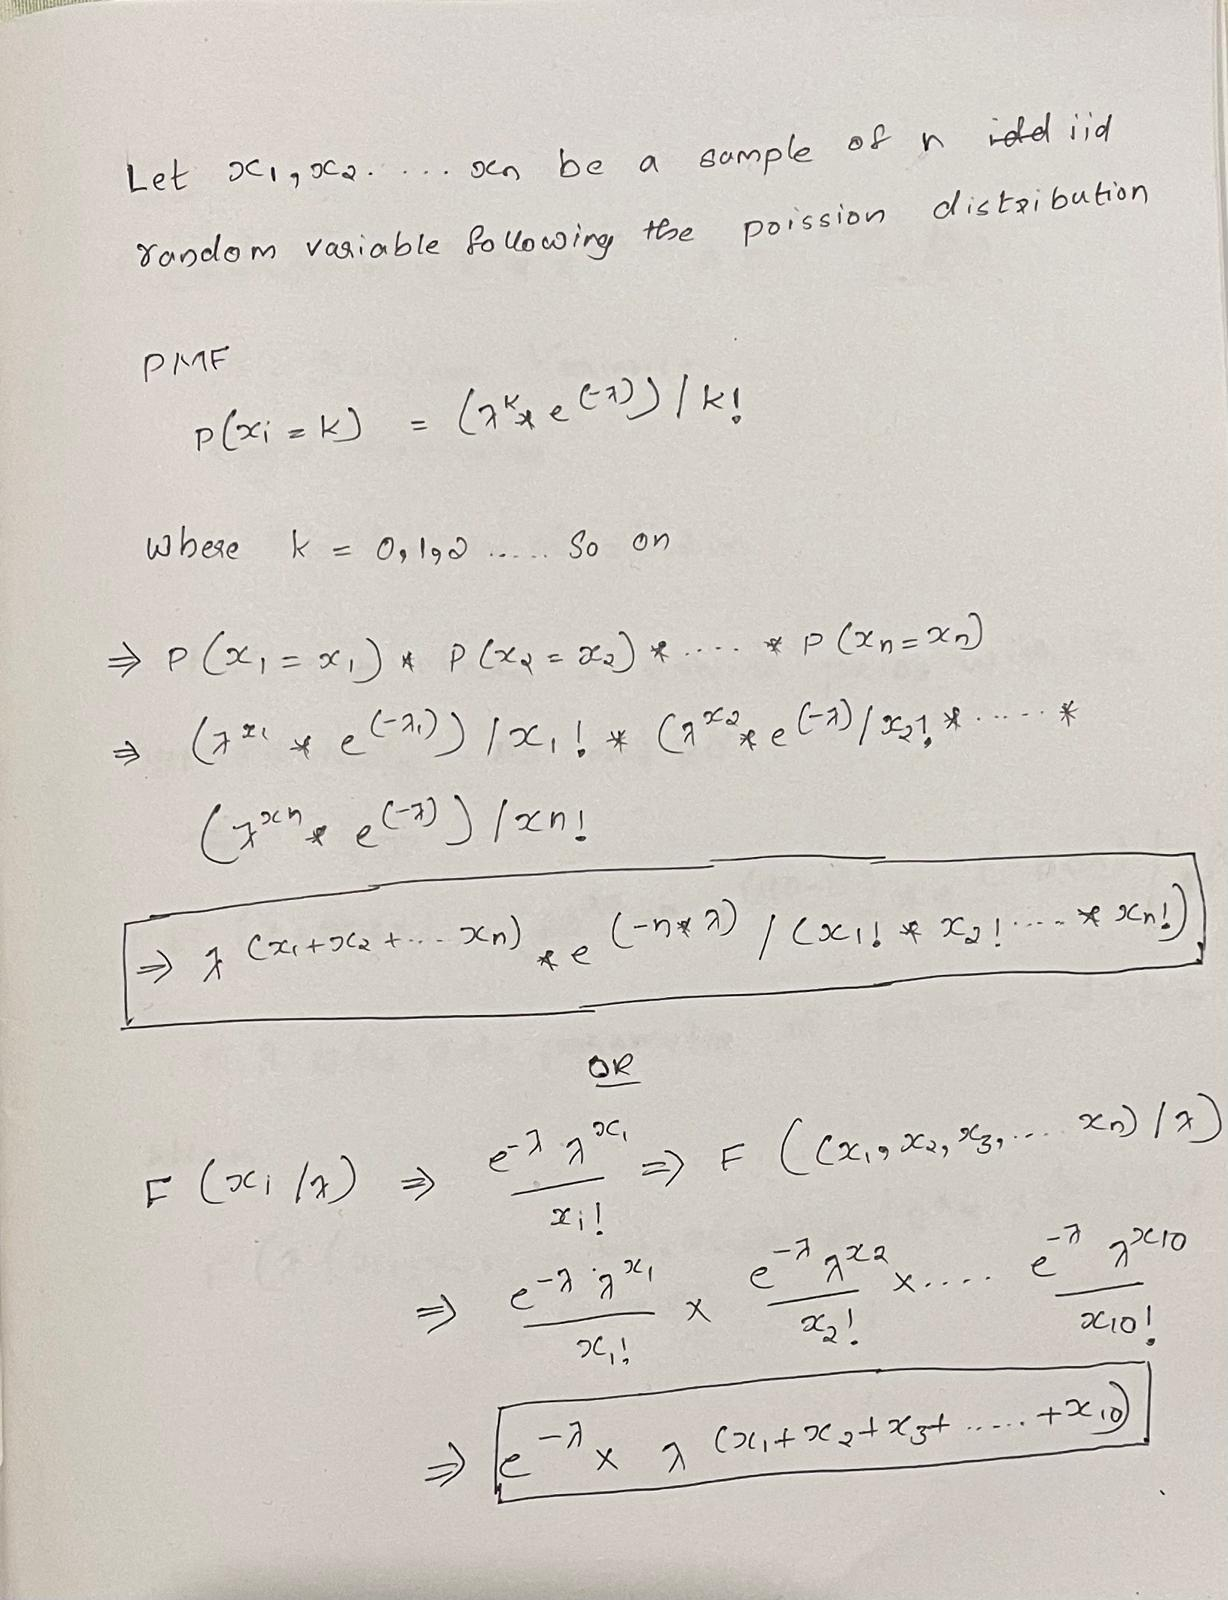

**b)** Adopt the appropriate conjugate prior to the parameter λ  (Hint: Choose hyperparameters optionally within the support of distribution).                                                                                 

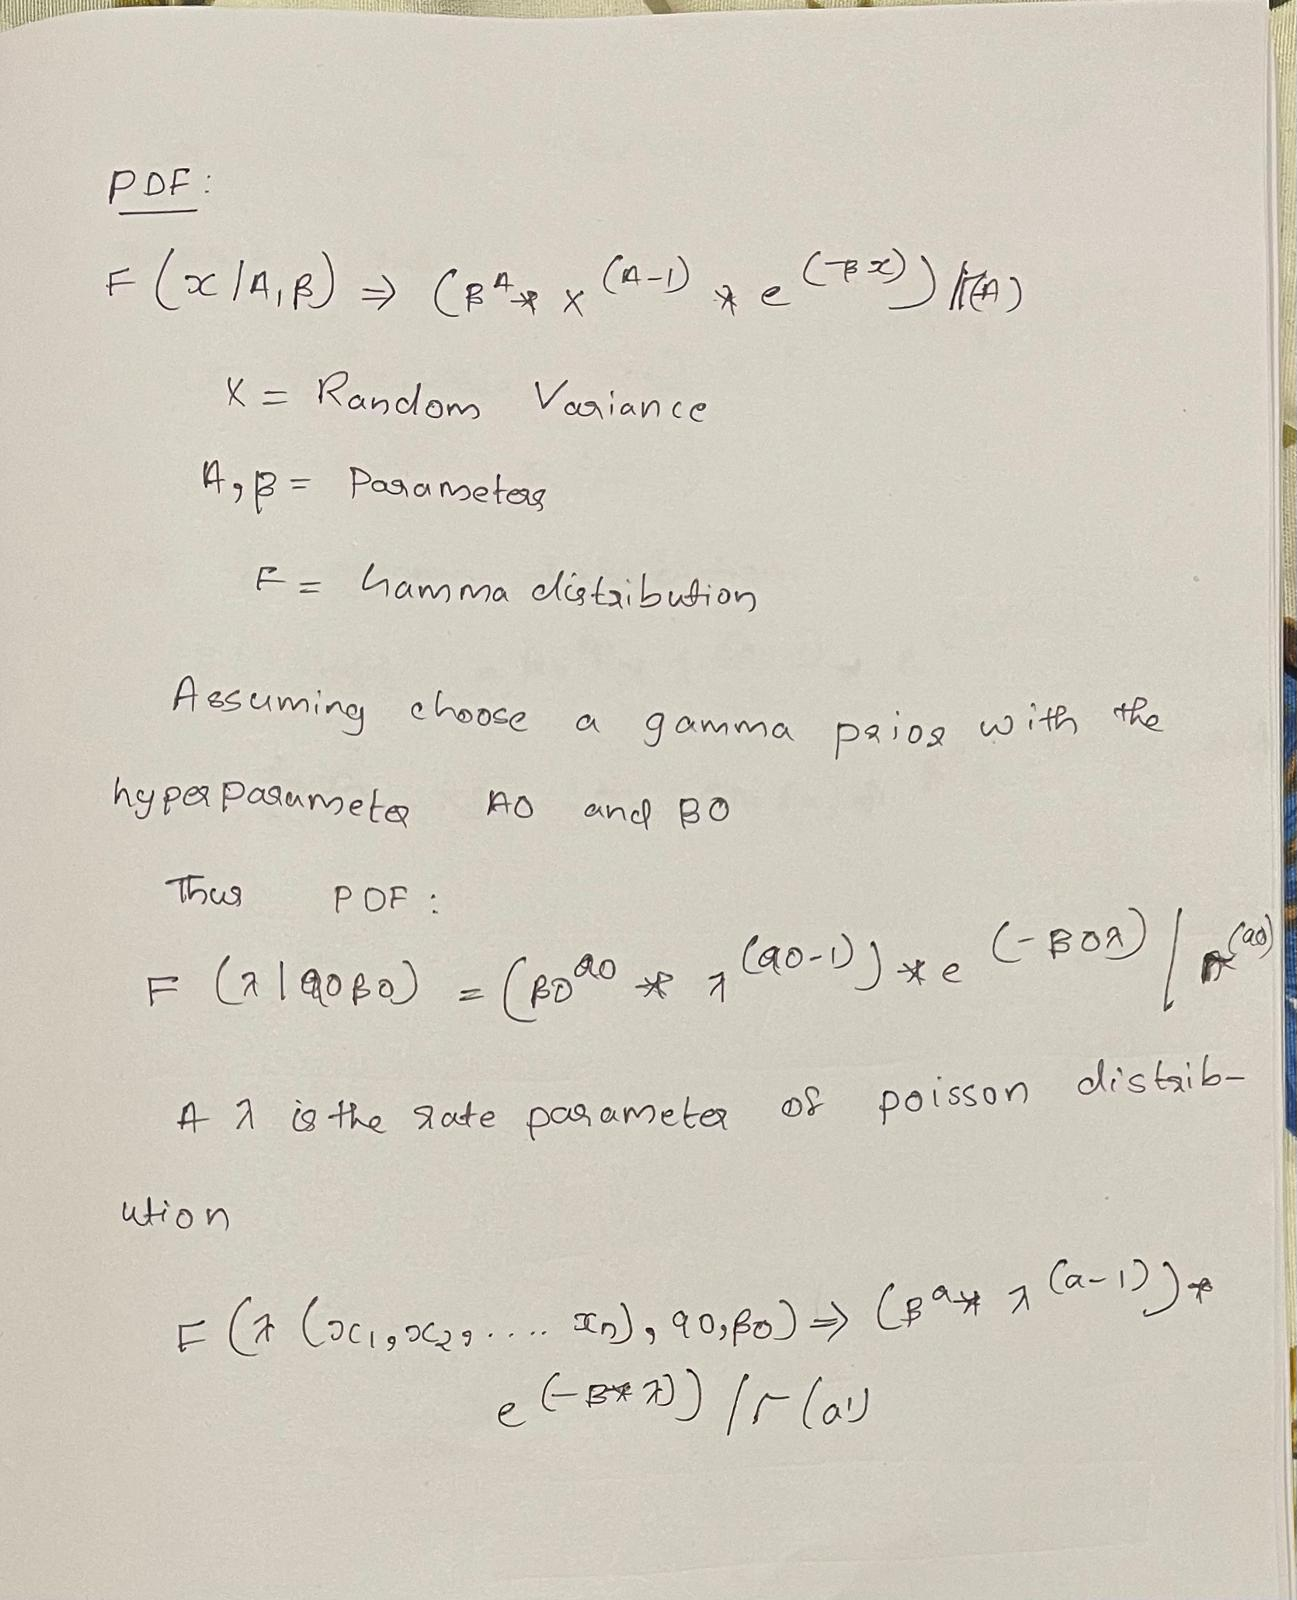

**c)** Using (a) and (b), find the posterior distribution of  λ

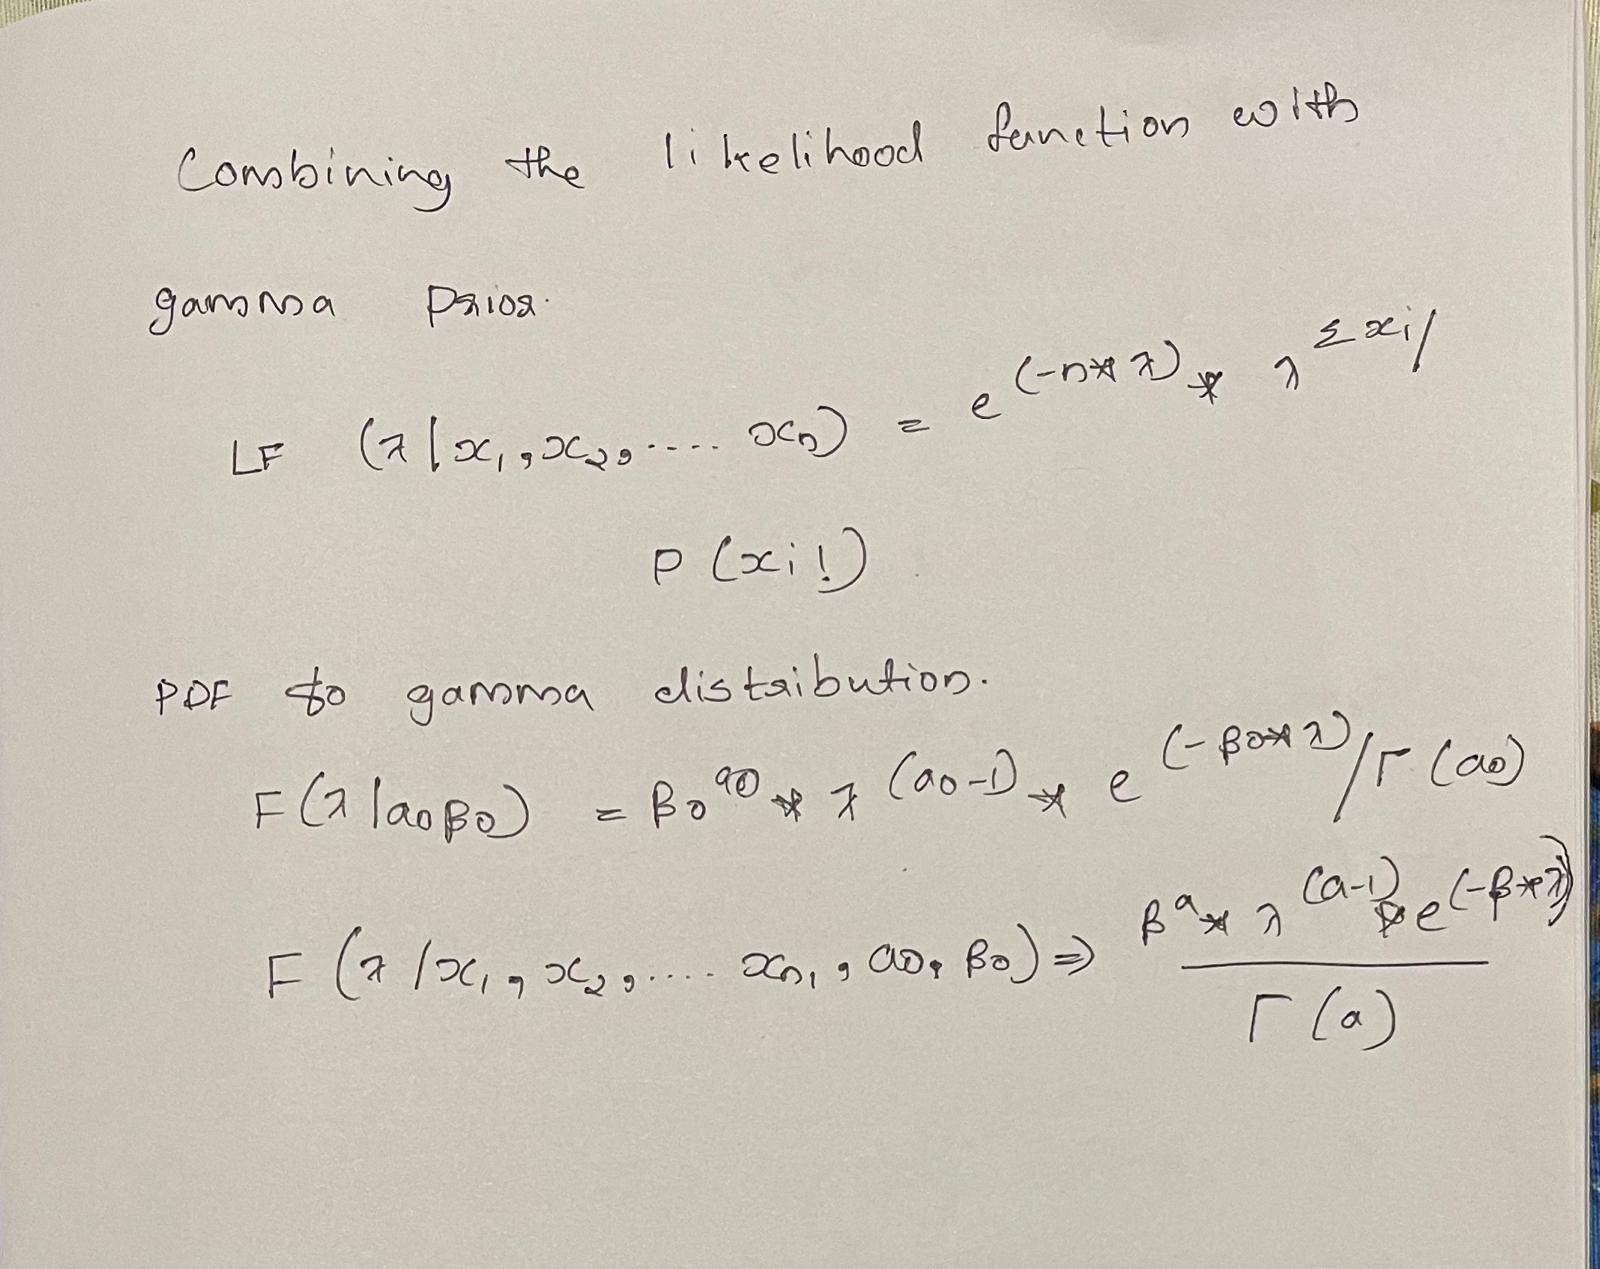

**d)** Compute the minimum Bayesian risk estimator of  λ

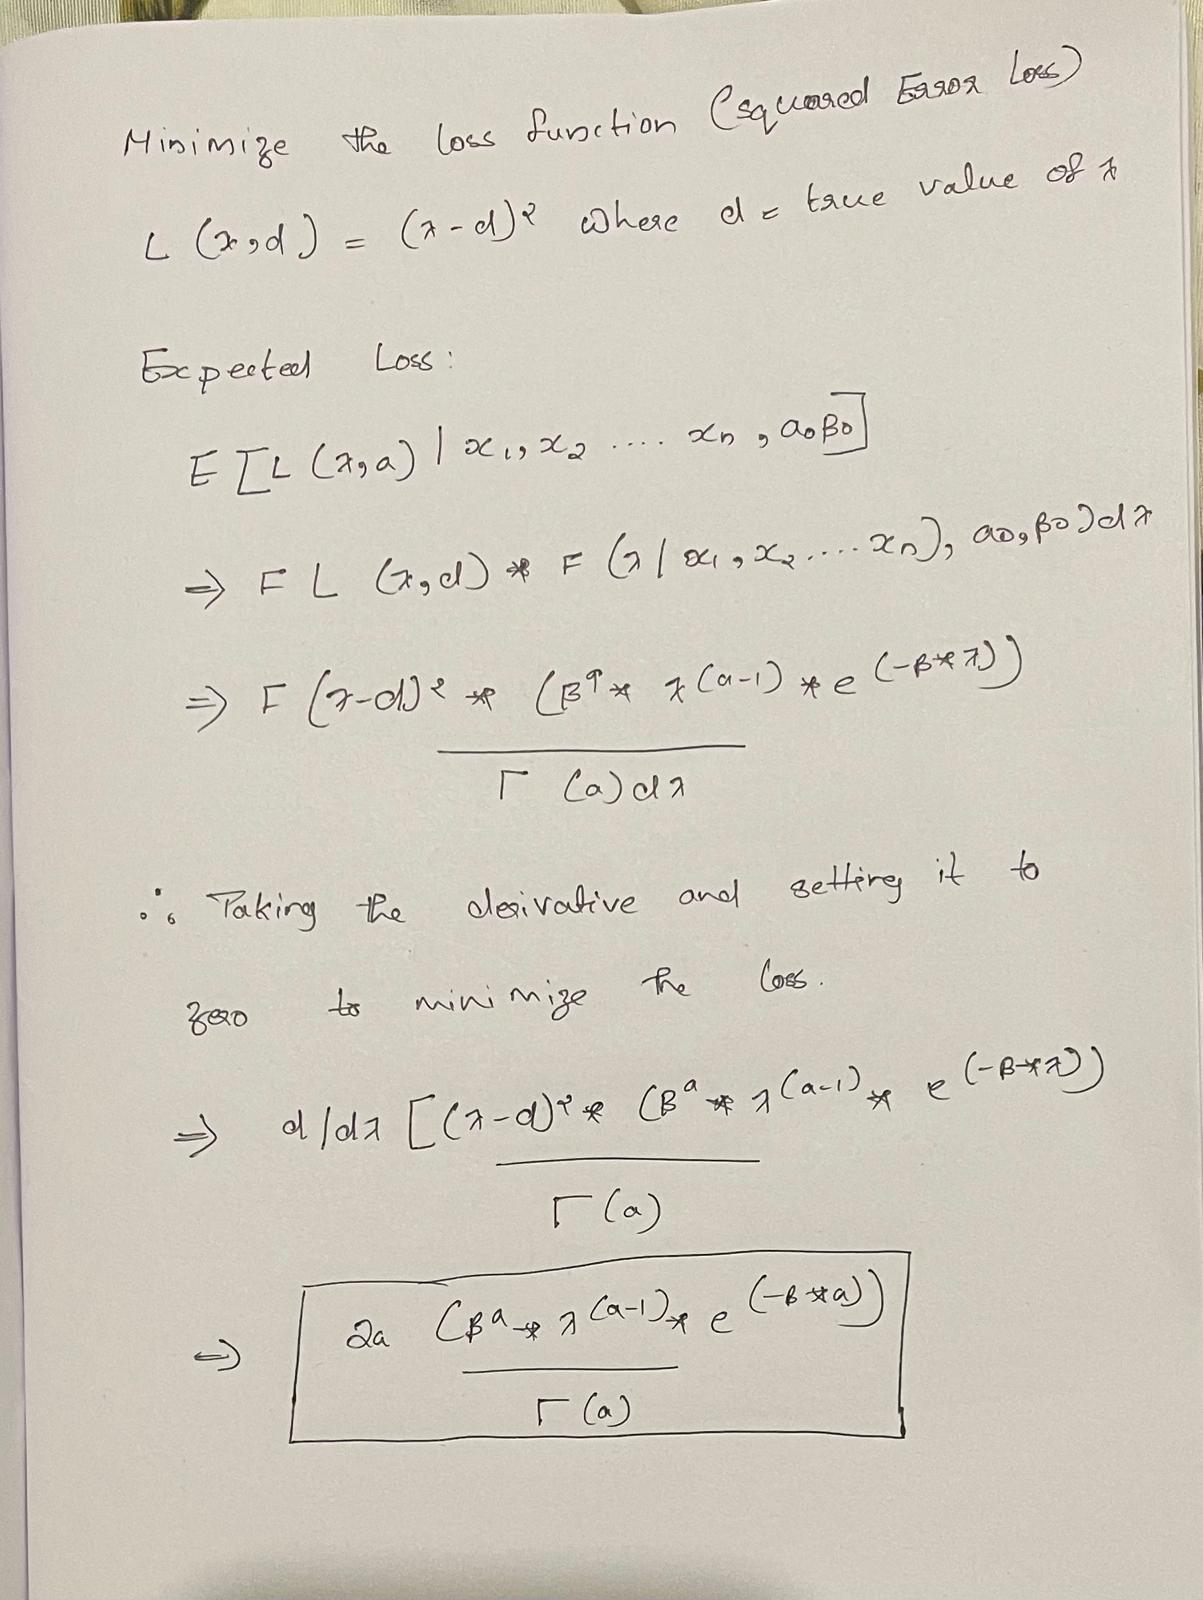

#**Question 3**

#***Use the a particular stock market dataset and apply the following steps to accomplish the time series analysis: ***

importing stock data here i am using bit-ucd

In [ ]:
install.packages("tidyquant")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('tidyquant')

In [ ]:
getSymbols("AMZN", from = "2020-11-11", src = "yahoo")

[1] "AMZN"

In [ ]:
head(AMZN)

           AMZN.Open AMZN.High AMZN.Low AMZN.Close AMZN.Volume AMZN.Adjusted
2020-11-11  153.0890  156.9575 152.5000   156.8695    87338000      156.8695
2020-11-12  157.9975  158.7940 154.3025   155.5140    87240000      155.5140
2020-11-13  156.1000  157.0860 154.2695   156.4405    75124000      156.4405
2020-11-16  154.6600  157.1350 153.6345   156.5530    76174000      156.5530
2020-11-17  159.1770  159.4625 156.7630   156.7830    68894000      156.7830
2020-11-18  156.7000  157.0000 155.2550   155.2730    58336000      155.2730

In [ ]:
install.packages("tseries")
install.packages("forecast")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
X=AMZN$AMZN.Close

**a)**	Check whether the time series is stationary in mean and variance

In [ ]:
library(ggplot2)

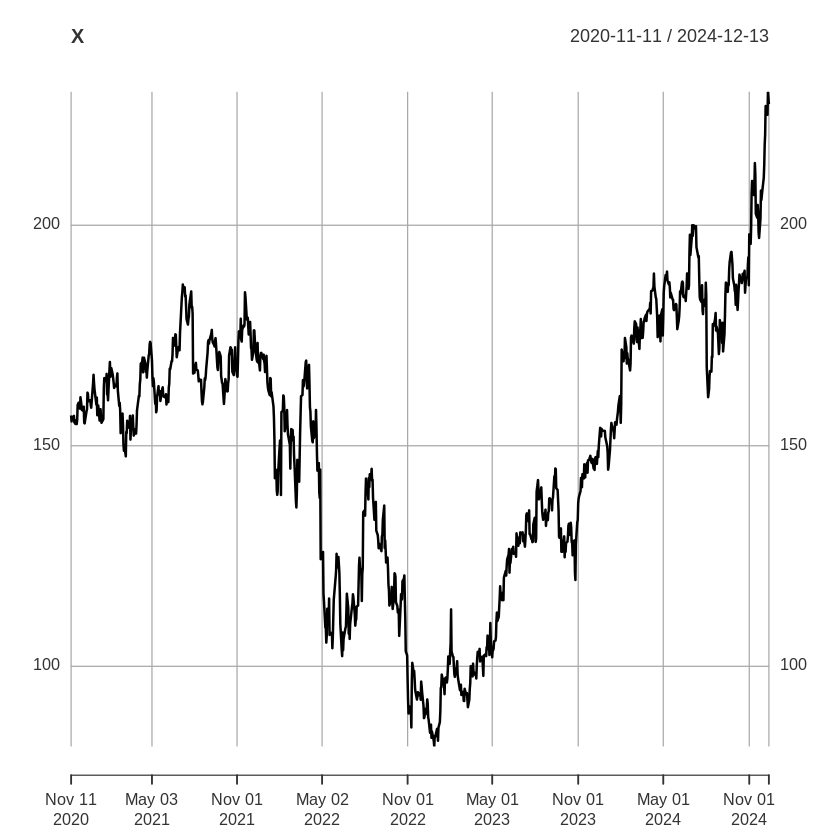

In [ ]:
plot(X)

here we see that there is an increasing trend , so it is non-stationarity in close price

In [ ]:
a=diff(X)

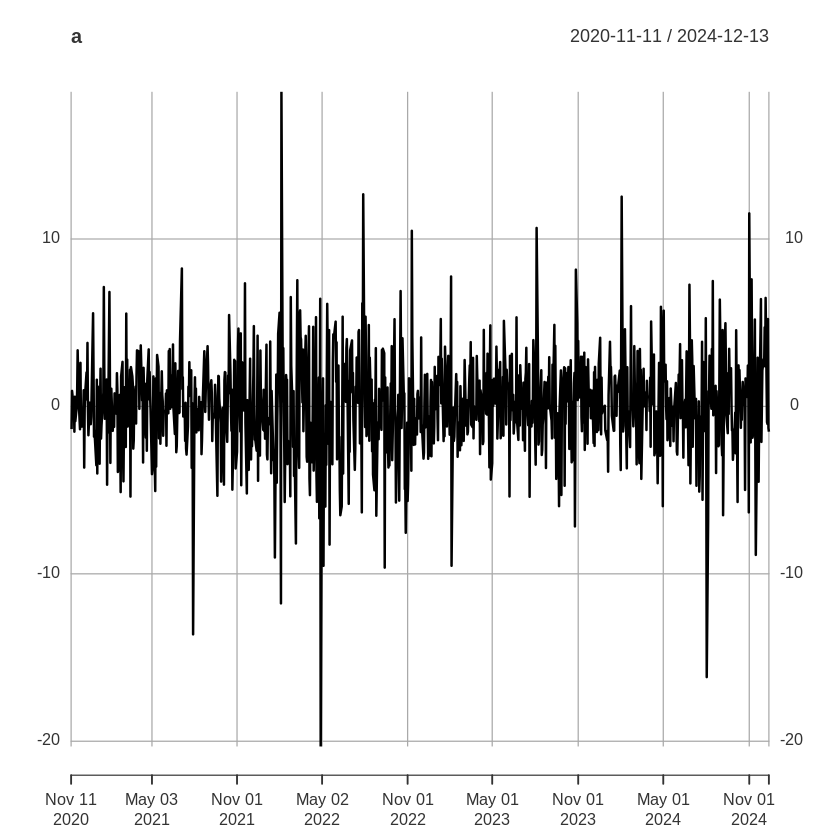

In [ ]:
plot(a)

to make the graph stationary in mean, used diff(),and the result is that the graph become stationary

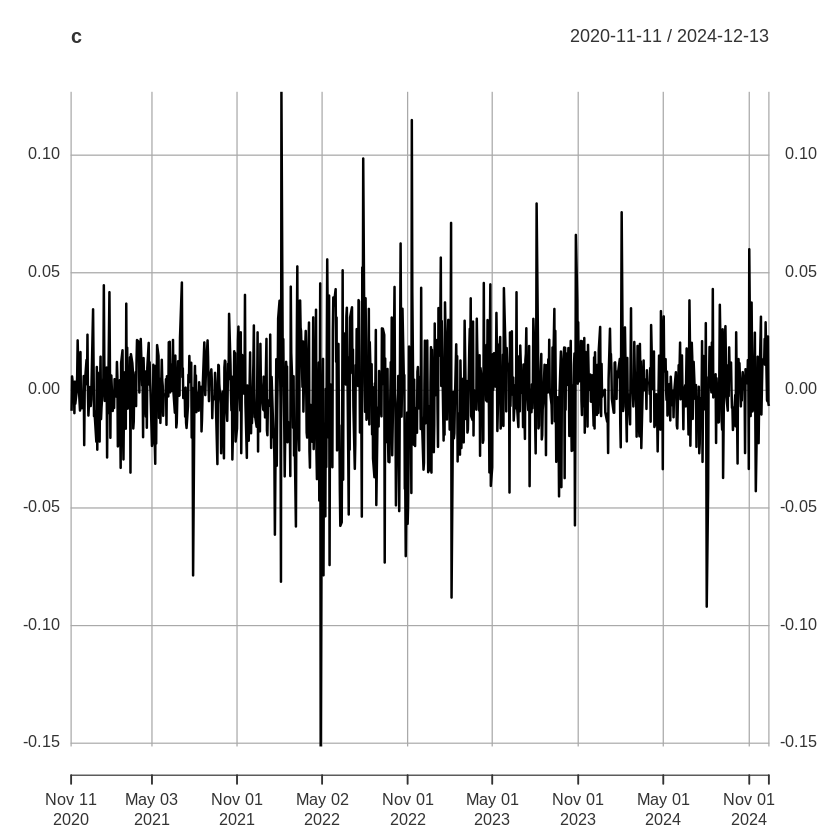

In [ ]:
b=log(X)
c=diff(b)
plot(c)

here to make the graph stationary for variance by using log(),and the graph become stationary

**b)**	Use acf() and pacf() functions to identify the order of AR and MA

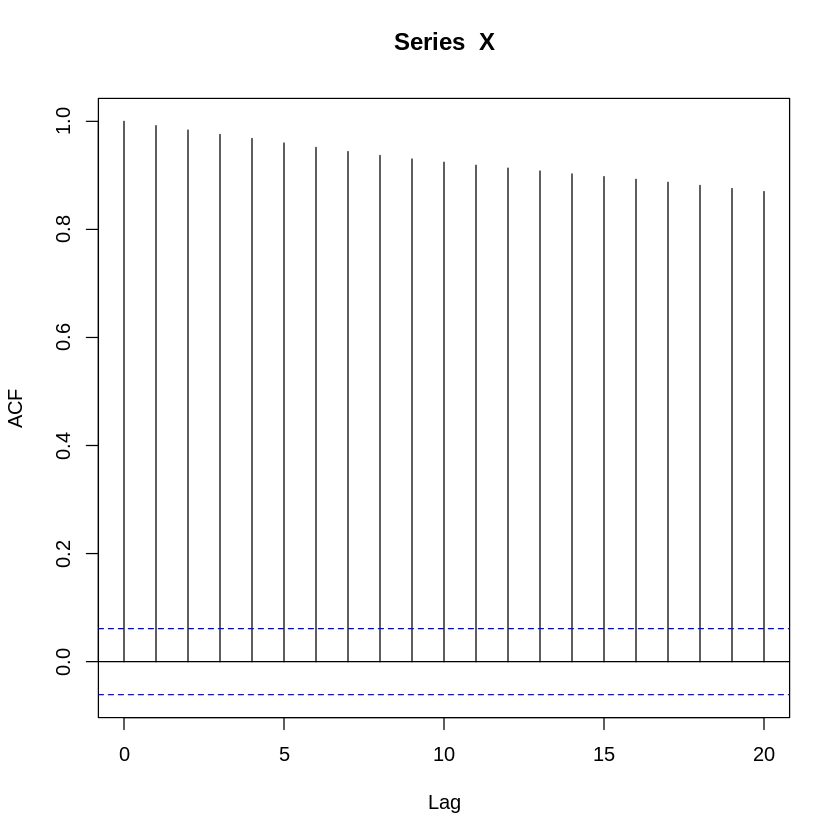

In [ ]:
acf(X,lag.max = 20)

the order of MA q=1,since single initial lag is outside the upper bond

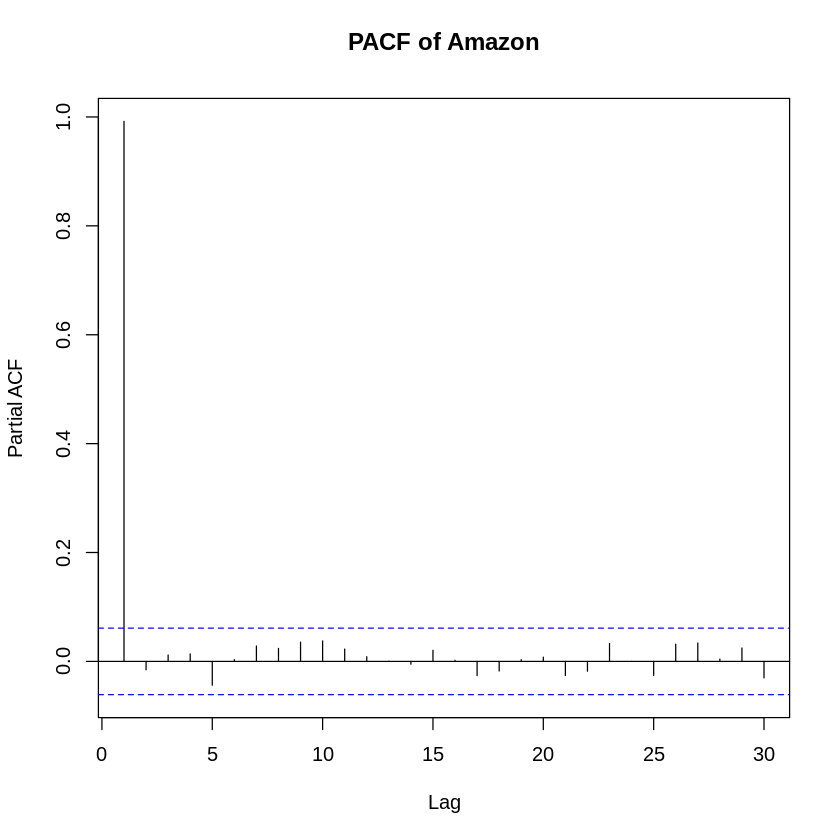

In [ ]:
pacf(X,main="PACF of Amazon")

the order of AR p=1,since  intial lag is outside the bounds.

**c)** Use auto.arima() to learn the best ARIMA model.               

In [ ]:
library('forecast')

In [ ]:
auto.fit_a=auto.arima(X, seasonal=T)
auto.fit_a

Series: X 
ARIMA(0,1,0) 

sigma^2 = 9.452:  log likelihood = -2613.21
AIC=5228.42   AICc=5228.43   BIC=5233.36

In [ ]:
auto.fit_b=auto.arima(X,seasonal=F)
auto.fit_b

Series: X 
ARIMA(0,1,0) 

sigma^2 = 9.452:  log likelihood = -2613.21
AIC=5228.42   AICc=5228.43   BIC=5233.36

**d)** Forecast h=10 step ahead prediction of the time series variable and plot it with the original time series.                                                    

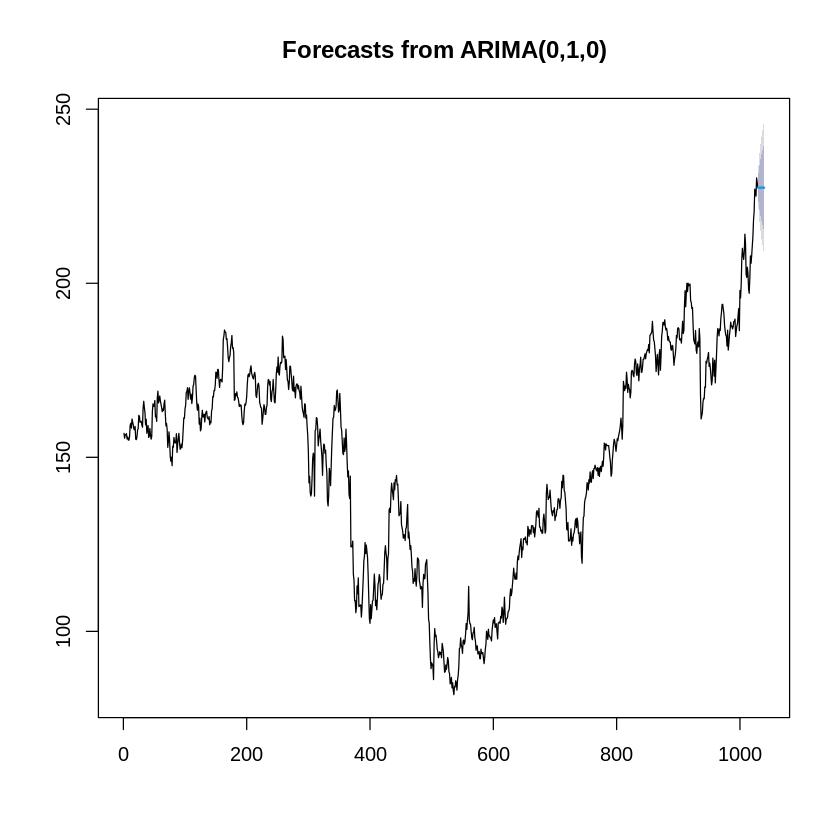

In [ ]:
auto.fcast=forecast(auto.fit_a,h=10)
plot(auto.fcast)

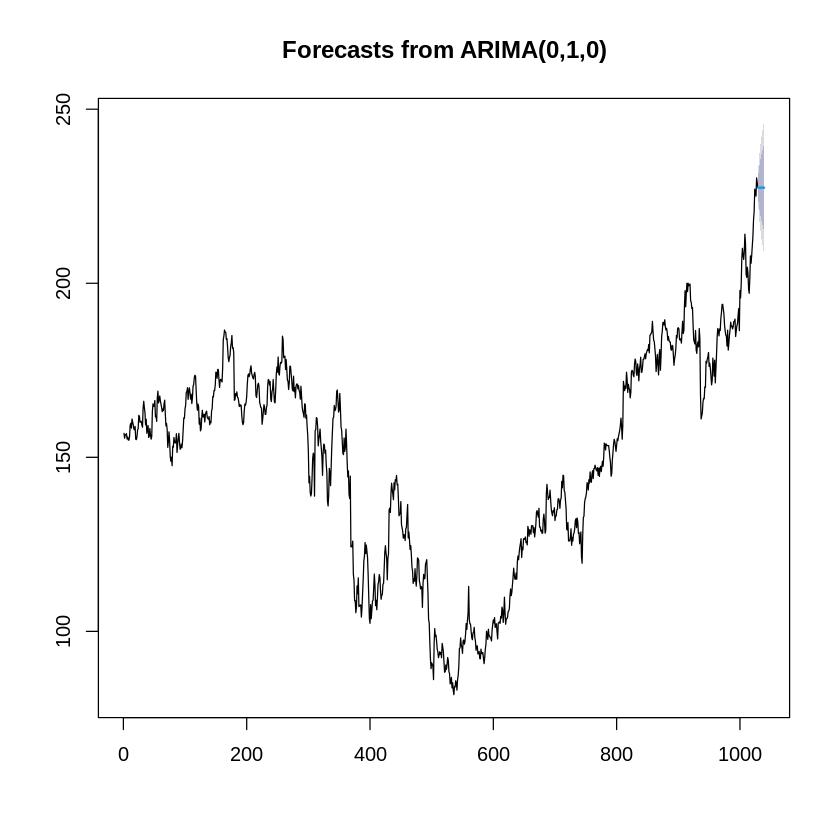

In [ ]:
auto.fcast=forecast(auto.fit_b,h=10)
plot(auto.fcast)

**Result**

both seasonal and non-seasonal are provided similar prediction so seasonality does not significantly improve the forecast